In [1]:
import os

In [2]:
%pwd

'c:\\Users\\Vador66\\Project\\Chest_Cancer\\research'

In [3]:
os.chdir("../")

In [4]:
%pwd

'c:\\Users\\Vador66\\Project\\Chest_Cancer'

In [5]:
from dataclasses import dataclass
from pathlib import Path


@dataclass(frozen=True)
class DataIngestionConfig:
    root_dir: Path
    source_URL: str
    local_data_file: Path
    unzip_dir: Path

In [6]:
from Chest_Cancer_Classifier.constants import *
from Chest_Cancer_Classifier.utils.common import read_yaml, create_directories

In [7]:
CONFIG_FILE_PATH

WindowsPath('config/config.yaml')

In [8]:
class ConfigurationManager:
    def __init__(
        self,
        config_filepath = CONFIG_FILE_PATH,
        params_filepath = PARAMS_FILE_PATH):

        self.config = read_yaml(config_filepath)
        self.params = read_yaml(params_filepath)

        create_directories([self.config.artifacts_root])


    
    def get_data_ingestion_config(self) -> DataIngestionConfig:
        config = self.config.data_ingestion

        create_directories([config.root_dir])

        data_ingestion_config = DataIngestionConfig(
            root_dir=config.root_dir,
            source_URL=config.source_URL,
            local_data_file=config.local_data_file,
            unzip_dir=config.unzip_dir 
        )

        return data_ingestion_config

In [9]:
import os
import zipfile
import gdown
from Chest_Cancer_Classifier import logger

In [10]:
class DataIngestion:
    def __init__(self, config: DataIngestionConfig):
        self.config = config


    def download_file(self)-> str:
        '''
        Fetch data from the url
        '''

        try: 
            dataset_url = self.config.source_URL
            zip_download_dir = self.config.local_data_file
            os.makedirs("artifacts/data_ingestion", exist_ok=True)
            logger.info(f"Downloading data from {dataset_url} into file {zip_download_dir}")

            file_id = dataset_url.split("/")[-2]
            prefix = 'https://drive.google.com/uc?/export=download&id='
            gdown.download(prefix+file_id, zip_download_dir)

            logger.info(f"Downloaded data from {dataset_url} into file {zip_download_dir}")

        except Exception as e:
            raise e
        
    
    def extract_zip_file(self):
        """
        zip_file_path: str
        Extracts the zip file into the data directory
        Function returns None
        """
        unzip_path = self.config.unzip_dir
        os.makedirs(unzip_path, exist_ok=True)
        with zipfile.ZipFile(self.config.local_data_file, 'r') as zip_ref:
            zip_ref.extractall(unzip_path)

In [11]:
try:
    config = ConfigurationManager()
    data_ingestion_config = config.get_data_ingestion_config()
    data_ingestion = DataIngestion(config=data_ingestion_config)
    data_ingestion.download_file()
    data_ingestion.extract_zip_file()
except Exception as e:
    raise e

[2024-08-28 02:14:08,554: INFO: common: yaml file: config\config.yaml loaded successfully]
[2024-08-28 02:14:08,556: INFO: common: yaml file: params.yaml loaded successfully]
[2024-08-28 02:14:08,557: INFO: common: created directory at: artifacts]
[2024-08-28 02:14:08,558: INFO: common: created directory at: artifacts/data_ingestion]
[2024-08-28 02:14:08,559: INFO: 988707113: Downloading data from https://drive.google.com/file/d/1rhecXr3EnJo1QyfyO6jgrpaZxJhMC0mB/view?usp=sharing into file artifacts/data_ingestion/data.zip]


Downloading...
From (original): https://drive.google.com/uc?/export=download&id=1rhecXr3EnJo1QyfyO6jgrpaZxJhMC0mB
From (redirected): https://drive.google.com/uc?%2Fexport=download&id=1rhecXr3EnJo1QyfyO6jgrpaZxJhMC0mB&confirm=t&uuid=17e58376-1c27-4749-8d44-92ecb7e043b4
To: c:\Users\Vador66\Project\Chest_Cancer\artifacts\data_ingestion\data.zip
100%|██████████| 124M/124M [00:01<00:00, 114MB/s]  

[2024-08-28 02:14:15,381: INFO: 988707113: Downloaded data from https://drive.google.com/file/d/1rhecXr3EnJo1QyfyO6jgrpaZxJhMC0mB/view?usp=sharing into file artifacts/data_ingestion/data.zip]


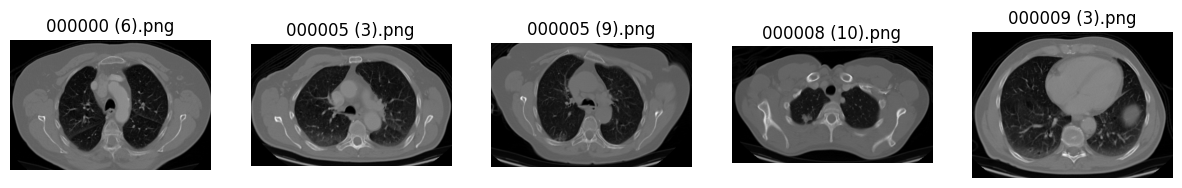

In [18]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define the base path to the "data" folder
base_path = 'artifacts/data_ingestion/data/'

# List all top-level directories within the base path
L = next(os.walk(base_path))[1]

# Define the new base path using the first directory in L
new_base_path = os.path.join(base_path, L[1])

# List all subdirectories within the new base path
X = next(os.walk(new_base_path))[1]

# Define the final path to the image directory
final_path = os.path.join(new_base_path, X[0])

# List all PNG files in the final path
png_files = [f for f in os.listdir(final_path) if f.endswith('.png')]

# Number of images to display
num_images_to_display = 5

# Plot the images
plt.figure(figsize=(15, 5))
for i in range(min(num_images_to_display, len(png_files))):
    img_path = os.path.join(final_path, png_files[i])
    img = Image.open(img_path)
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(img)
    plt.title(png_files[i])
    plt.axis('off')
plt.show()

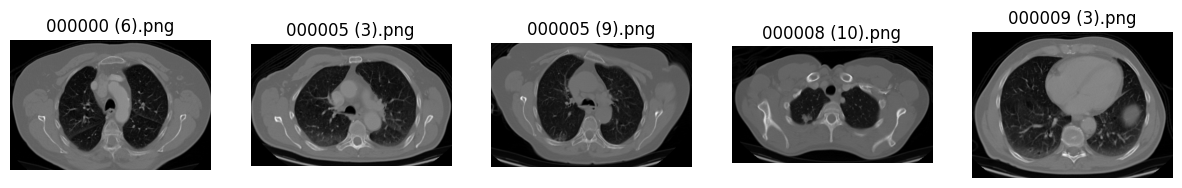

In [5]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define the path to the dataset
dataset_path = 'artifacts/data_ingestion/Data/Train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'

# List all PNG files in the dataset directory
png_files = [f for f in os.listdir(dataset_path) if f.endswith('.png')]

# Number of images to display
num_images_to_display = 5

# Plot the images
plt.figure(figsize=(15, 5))
for i in range(num_images_to_display):
    img_path = os.path.join(dataset_path, png_files[i])
    img = Image.open(img_path)
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(img)
    plt.title(png_files[i])
    plt.axis('off')
plt.show()

In [4]:
os.chdir("../")

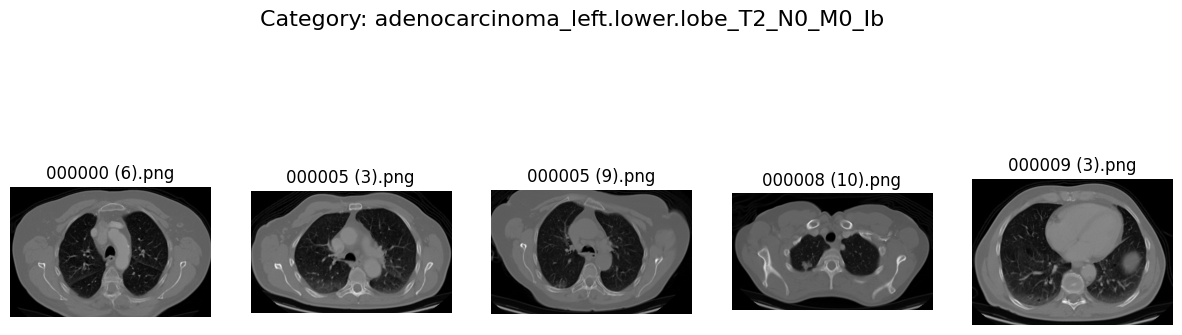

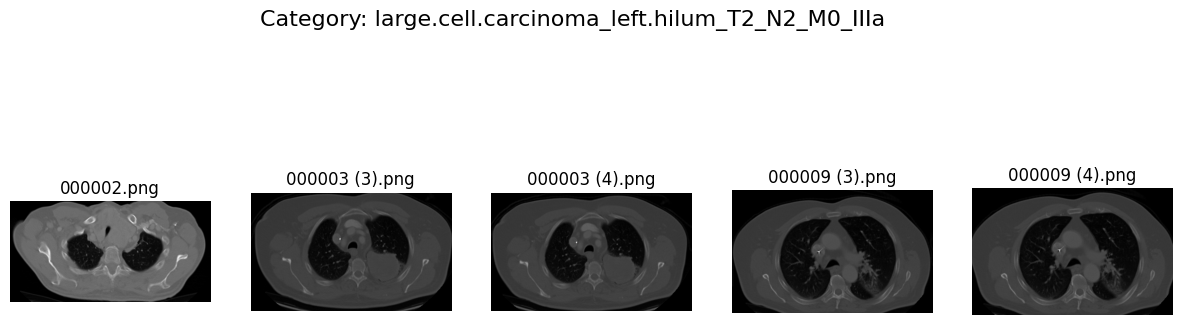

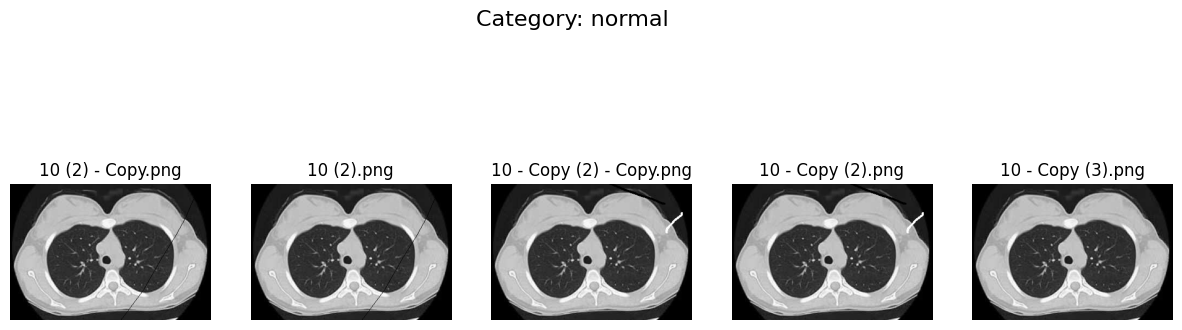

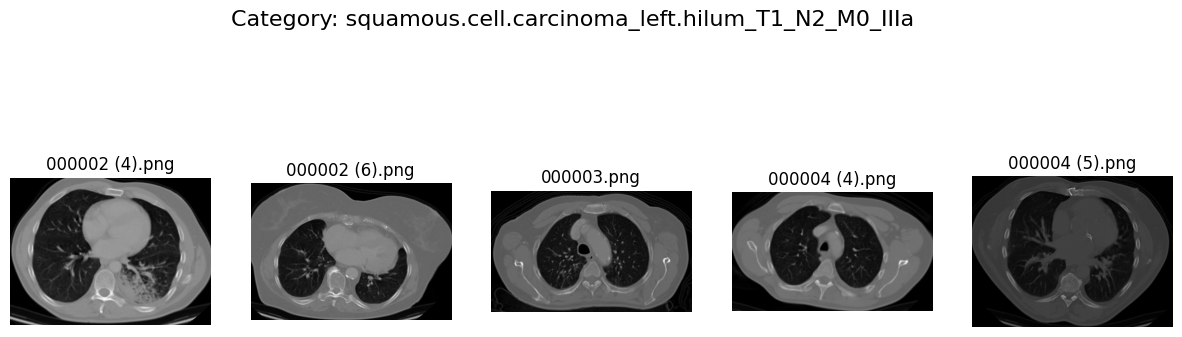

In [19]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define the base path to the "train" folder
base_path = 'artifacts/data_ingestion/data/train/'

# List all category directories within the base path
categories = next(os.walk(base_path))[1]

# Number of images to display per category
num_images_to_display = 5

# Iterate over each category
for category in categories:
    category_path = os.path.join(base_path, category)
    
    # List all PNG files in the category path
    png_files = [f for f in os.listdir(category_path) if f.endswith('.png')]
    
    # Plot the images
    plt.figure(figsize=(15, 5))
    plt.suptitle(f'Category: {category}', fontsize=16)
    for i in range(min(num_images_to_display, len(png_files))):
        img_path = os.path.join(category_path, png_files[i])
        img = Image.open(img_path)
        plt.subplot(1, num_images_to_display, i + 1)
        plt.imshow(img)
        plt.title(png_files[i])
        plt.axis('off')
    plt.show()